#  Проверка гипотез по увеличению выручки в интернет-магазине — оценка результатов A/B теста

1. [Описание](#describing)


2. [Приоритизация гипотез](#prioritizing)


3. [Анализ A/B-теста](#A/B)

    3.1 [Расчет кумулятивных показателей](#cumulativemetrics)
    
    3.2 [Поиск и фильтрация аномальных значений](#seekanddestroy)
    
    3.3 [Проверка статистических гипотез](#statistics)
    
    
4. [Вывод](#conclusion)

## Описание
<a id = 'describing'></a>

**Цель проекта** - провести анализ результатов A/B-теста улучшений, направленных на повышение выручки.

**Задачи**:

- Загрузить датасеты с информацией о предлагаемых гипотезах и результатах A/B теста;
    
- Провести приоритизацию гипотез методиками ICE и RICE;
    
- Анализ данных, полученных в ходе проведения A/B-теста.

In [1]:
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Приоритизация гипотез
<a id = 'prioritizing'></a>

Откроем и изучим датасет с гипотезами.

In [2]:
hypothesis = pd.read_csv('C://Users//1//Downloads//hypothesis.csv')
hypothesis.info()
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# Приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

Проведем приоритизацию гипотез

In [4]:
# Приотритизурем по формуле ICE
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
# Приоритизируем по формуле RICE
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
# Посмотрим результаты, осортировав значения столбцов ice и rice
display(hypothesis.sort_values(by='ice', ascending=False))
display(hypothesis.sort_values(by='rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


In [5]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Оценка ICE распределила гипотезы следующим образом: 8, 0, 7, 6, 2. Для сравнения выберем пять гипотез с наивысшими оценками.
Оценки RICE дают такой список по убыванию оценок: 7, 2, 0, 6, 8.

Видим, что первая гипотеза по оценке ICE стала пятой по оценке RICE, а вторая с пятого места переместилась на второе. Причина изменения положения гипотез в рейтинге связана с использованием параметра reach в шаблоне RICE, который учитывает охват пользователей, которых затронут изменения.

## Анализ A/B-теста
<a id = 'A/B'></a>

Откроем датасеты и изучим данные

In [6]:
orders = pd.read_csv('C://Users//1//Downloads//orders.csv')
visitors = pd.read_csv('C://Users//1//Downloads//visitors.csv')
orders.info()
visitors.info()
display(orders.head(10))
display(visitors.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [7]:
# Проверим на дубликаты
orders.duplicated().sum()
visitors.duplicated().sum()

0

Для работы с таблицами необходимо изменить тип данных столбца date

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим нет ли пересечения пользователей в тестовых группах.

In [9]:
df1 = orders.query('group == "A"')

In [10]:
df2 = orders.query('group == "B"')

In [11]:
repeats = df1.merge(df2, on = 'visitorId', how = 'inner')['visitorId']

In [12]:
orders = orders.query('visitorId not in @repeats')

In [13]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [14]:
len(repeats)

183

183 участников теста попали одновременно в две группы.

### Расчет кумулятивных показателей
<a id = 'cumulativemetrics'></a>

In [15]:
#Получим датафрейм с уникальными парами даты и группы теста
datesGroups = orders[['date','group']].drop_duplicates()
display(datesGroups.head())

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [16]:
#Получаем строки из таблицы с заказами, с датами меньше или равными датам из datesGroups и группами равными группам
#из datesGroupes. Агрегируем значения колонок date, group, transactionId, visitorId, revenue.
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']
                                                                     , orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionId' : 'nunique', 
                                           'visitorId' : 'nunique', 
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
display(ordersAggregated.head())

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [17]:
#Получим аналогичную таблицу для покупателей
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                       visitors['group'] == x['group'])]
                                      .agg({'date':'max',
                                            'group':'max',
                                            'visitors':'sum'
                                           }),axis=1).sort_values(by=['date','group'])
display(visitorsAggregated.head())

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [18]:
#Объединим кумулятивные данные в одну таблицу
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date','group'])
display(cumulativeData.head())
#Изменим имена столбцов
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням тестирования

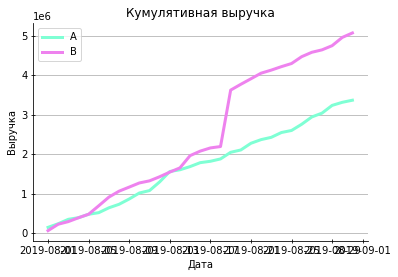

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color = 'aquamarine', linewidth = 3)

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color = 'violet', linewidth = 3)

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка')
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(direction = 'inout')
plt.grid(color='black', alpha = 0.3, axis = 'y', linestyle = '-')

sns.despine()
plt.legend()
plt.show()

Выручка увеличивается в течение всего периода проведения теста. Выручка для группы B всегда больше, чем выручка группы A. 

На графике выручки для группы B заметен резкий подъем, который может быть связан с аномально крупными заказами, либо с резким увеличением числа заказов.

Построим график кумулятивного среднего чека по группам

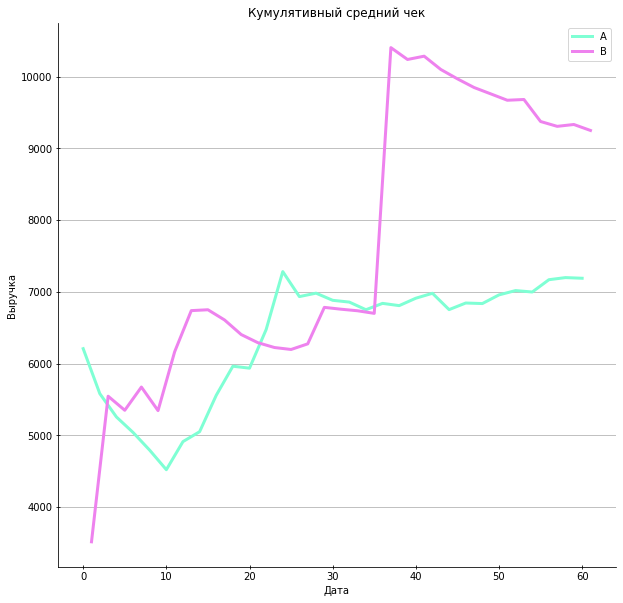

In [20]:
plt.plot(cumulativeRevenueA['revenue'] / cumulativeRevenueA['transactions'], label='A', color = 'aquamarine', linewidth = 3)

plt.plot(cumulativeRevenueB['revenue'] / cumulativeRevenueB['transactions'], label='B', color = 'violet', linewidth = 3)

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивный средний чек')
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(direction = 'inout')
plt.grid(color='black', alpha = 0.3, axis = 'y', linestyle = '-')

sns.despine()
plt.legend()
plt.show()

Для группы A средний чек продолжает расти к концу теста, а для группы B падать.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


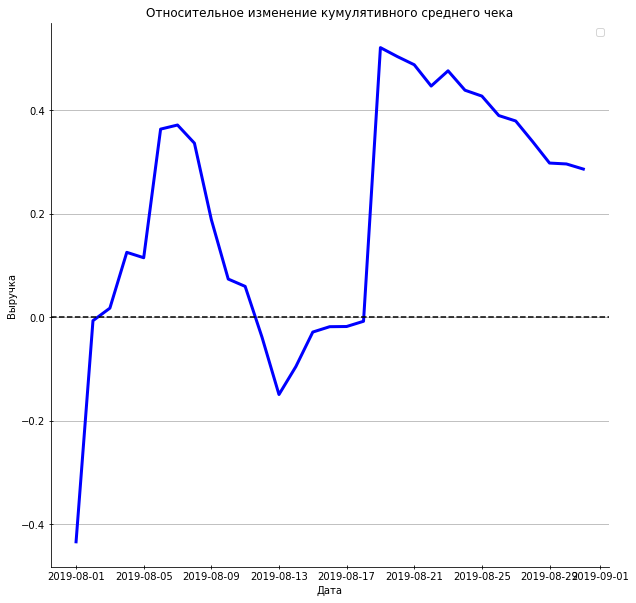

In [21]:
#Построим график относительного изменения кумулятивного среднего чека
# объединяем таблицы с кумулятивными данными для групп
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим кривую отношения средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1, 
         color = 'blue', linewidth = 3)

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Относительное изменение кумулятивного среднего чека')
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(direction = 'inout')
plt.grid(color='black', alpha = 0.3, axis = 'y', linestyle = '-')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
sns.despine()
plt.legend()
plt.show()

На графике присутствуют точки, где соотношение между средними чеками резко изменяется. Необходимо проверить данные на аномальные значения.

Теперь построим график кумулятивной конверсии по группам

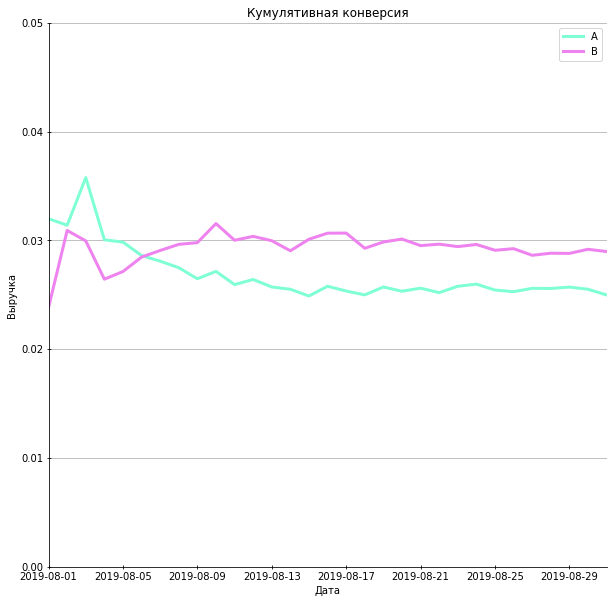

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['transactions']/cumulativeData['visitors']

# срез по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# срез по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color = 'aquamarine', linewidth = 3)
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color = 'violet', linewidth = 3)

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная конверсия')
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(direction = 'inout')
plt.grid(color='black', alpha = 0.3, axis = 'y', linestyle = '-')

# задаем масштаб осей
plt.axis([cumulativeData['date'].min(), cumulativeData['date'].max(), 0, 0.05]) 

sns.despine()
plt.legend()
plt.show()

Кумулятивная конверсия группы B имеет стабильно более высокое значение, чем у группы A.

Построим график относительного изменения кумулятивных конверсий B и A

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


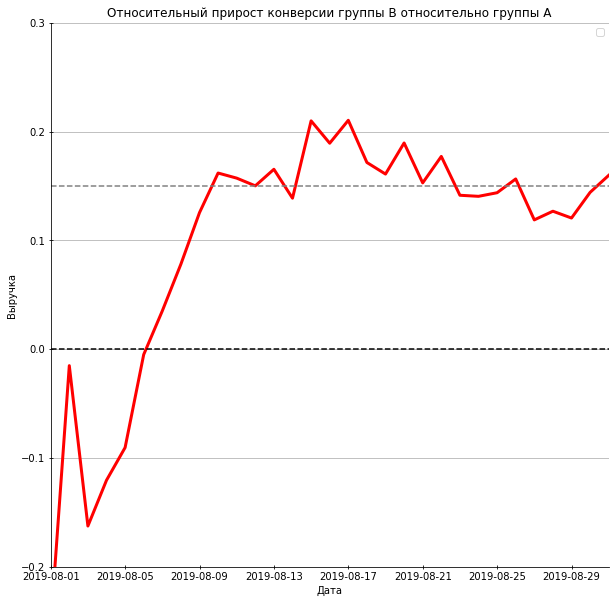

In [23]:
#Объединяем таблицы с кумулятивной конверсией
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#Строим график относительного изменения кумулятивной конверсии

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         color = 'red', linewidth = 3)

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(direction = 'inout')
plt.grid(color='black', alpha = 0.3, axis = 'y', linestyle = '-')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([cumulativeData['date'].min(), cumulativeData['date'].max(), -0.2, 0.3]) 
sns.despine()
plt.legend()
plt.show()

Конверсия группы B превышала конверсию группы A на протяжении практически всего теста, проигрывая в начале, но быстро превысив величину для группы A. На графике относительного прироста наблюдаются изменения наклона кривой, что говорит о том, что постоянное отношение конверсии в ходе теста не установилось. К концу теста конверсия группы B снова начинает увеличиваться отностительно конверсии группы A.

### Поиск и фильтрация аномальных значений
<a id = 'seekanddestroy'></a>

Построим точечный график количества заказов по пользователям

In [24]:
#Сгруппируем таблицу orders по пользователям
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})

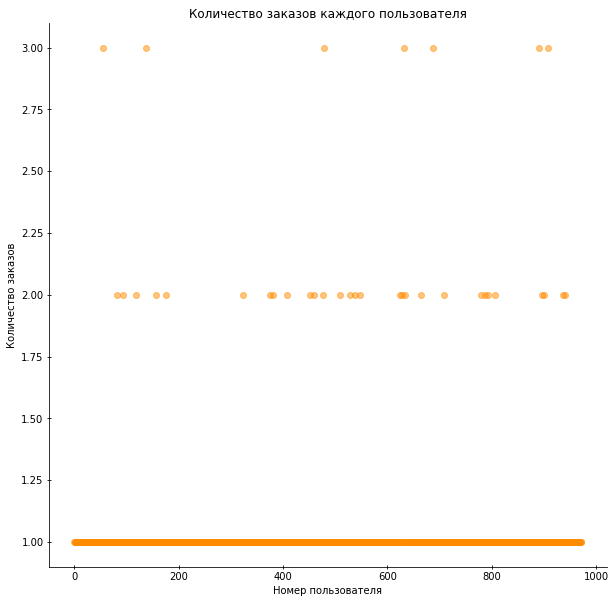

In [25]:
#Построим график
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId'], color = 'darkorange', alpha = .5)
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')
plt.title('Количество заказов каждого пользователя')
sns.despine()
plt.tick_params(direction = 'inout')
plt.show()

Большинство пользователей совершают 1-3 заказа. Необходимо расчитать перцентили количества заказов на пользователя.

In [26]:
print(np.percentile(ordersByUsers['transactionId'], [90, 95, 99])) 

[1. 1. 2.]


Не более 1 % пользователей совершали более 2 заказов. Выберем как параметр для фильтрации 99% перцентиль.

Построим точечный график стоимости заказов

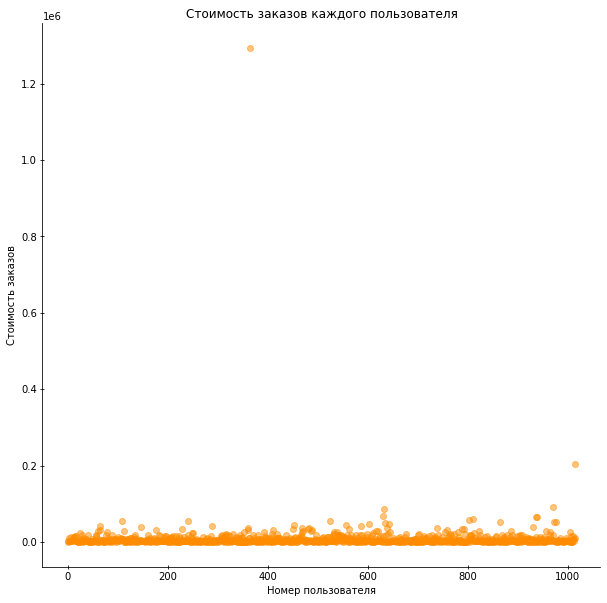

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'], color = 'darkorange', alpha = .5)
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказов')
plt.title('Стоимость заказов каждого пользователя')
sns.despine()
plt.tick_params(direction = 'inout')
plt.show()

Видно, что сильно отличаются величиной суммы оплаты два заказа.

Рассчитаем перцентили стоимости заказов.

In [28]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


Не более 1 % пользователей совершали заказ на сумму 53904 и выше. Выберем данный параметр в качестве границы.

### Проверка статистических гипотез
<a id = 'statistics'></a>

Нулевая гипотеза H0: разница между значениями в выборках статистически значима.\
Альтернативаня гипотеза H1: между выборками отсутствует статистически значимое различие.

In [29]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'] 
#для пользователей, которые хотя бы раз совершили заказ.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transaction']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transaction'] 

In [30]:
#Создаем переменные sampleA и sampleB с выборками пользователей из каждой группы с количеством их заказов.
sampleA = pd.concat([ordersByUsersA['transaction'],pd.Series(0, index=np.arange(cumulativeDataA['visitors'].sum() - len(ordersByUsersA['transaction'])), name='transaction')],axis=0)

sampleB = pd.concat([ordersByUsersB['transaction'],pd.Series(0, index=np.arange(cumulativeDataB['visitors'].sum() - len(ordersByUsersB['transaction'])), name='transaction')],axis=0)
#Расчет статистической значимости по критерию Манна-Уитни
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.010
0.166


p-value 0.010 меньше, чем 0.05 значит между сырыми данными конверсии существуют статистически значимые различия.

Расчитаем статистическую значимость различий между сырыми данными для среднего чека.

In [32]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


p-value 0.829 - это значит что статистически значимых различий в выборках для среднего чека нету. А средний чек в группе B на 26 % выше, чем в A.

Проведем расчеты для очищенных данных.

In [44]:
# Узнаем количество пользователей с аномально высоким числом заказов и высокой суммой заказа
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['transaction'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
Name: visitorId, dtype: int64
55


Всего 55 пользователя с аномальными показателями.

In [49]:
#Отфильтруем данные
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transaction'],
        pd.Series(
            0,
            index=np.arange(
               cumulativeDataA['visitors'].sum() - len(ordersByUsersA['transaction'])
            ),
            name='transaction',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transaction'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataB['visitors'].sum() - len(ordersByUsersB['transaction'])
            ),
            name='transaction',
        ),
    ],
    axis=0,
) 

In [47]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.008
0.194


p-value 0.008, значит после фильтрации аномальных значений существует статистически значимое различие между конверсией в группах. Исключение пользователей с аномальными показателями, не позволило устранить статистически значимую разницу.

Проведем аналогичный расчет для среднего чека.

In [48]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.762
-0.022


Получили близкую величину p-value. Но после исключения аномальных данных средний чек для B оказался ниже, чем для A.

## Вывод
<a id = 'conclusion'></a>

* Между конверсиями в группах A и B существует статистически значимое различие. Фильтрация аномальных значений не помогла его устранить.

* Статистически значимое различие по среднему чеку между группами отсутствует. Как по «сырым» данным, так и по данным после фильтрации аномалий.

* Для группы B наблюдается более высокая конверсия, в то же время как средний чек меньше, чем в группе А. Такое положение обнаружилось после исключения аномальных пользователей с высоким количеством заказов, а также заказов с очень высокой стоимостью. Эти аномалии были причиной высокого значения кумулятивной величины среднего чека для группы B. 

* Конверсия B на графике имеет тенденцию к росту, а A к снижению, в то время как разность в средних чеках стабилизировалась и составляет 2 %. По предоставленным данным отчетливо видно, что результаты группы B лучше, чем A. Тест необходимо остановить и принять результаты.